In [14]:
##Zadanie 1
#Importowanie danych z plików CSV

import pandas as pd

#a)wczytaj plik ‘landtempssample.csv’, ustal nazwy nagłówków na: ‘ID_stacji’,’rok’,
#‘miesiąc’,’srednia_temperatura’,‘szerokosc_geograficzna,’dlugosc_geograficzna,’wys
#okosc’,’stacja’,’ID_panstwa,’nazwa_panstwa’. Wskaż kolumny, które powinny zostać
#zinterpretowane jako daty. W tym przypadku, kolumny 'miesiąc' i 'rok' są łączone i
#interpretowane jako jedna kolumna daty. Zastosuj parametr skiprows, który pozwoli
#pominąć pierwszy wiersz.

kolumny = [
    "ID_stacji", "rok", "miesiąc", "srednia_temperatura", "szerokosc_geograficzna",
    "dlugosc_geograficzna", "wysokosc", "stacja", "ID_panstwa", "nazwa_panstwa"
]

df = pd.read_csv("landtempssample.csv", names=kolumny, skiprows=1)

# b)utworzenie nowej kolumny 'data_pomiaru' z połączenia 'rok' i 'miesiąc'

df["data_pomiaru"] = pd.to_datetime(df["rok"].astype(str) + "-" + df["miesiąc"].astype(str) + "-01")

# c)statystyki podsumowujące średnią miesięczną temperaturę
print("Statystyki dla 'srednia_temperatura':\n", df["srednia_temperatura"].describe())

# d)znalezienie brakujących wartości w każdej kolumnie
print("\nLiczba brakujących wartości w każdej kolumnie:\n", df.isnull().sum())

# e)usunięcie wierszy z brakami w kolumnie 'srednia_temperatura'
df = df.dropna(subset=["srednia_temperatura"])

#wyświetlenie pierwszych 5 wierszy przetworzonych danych
print("\nPierwsze 5 wierszy po oczyszczeniu danych:")
print(df.head())

#zapisanie przetworzonych danych do nowego pliku CSV
df.to_csv("landtempssample_clean.csv", index=False)

Statystyki dla 'srednia_temperatura':
 count   85554.00
mean       10.92
std        11.52
min       -70.70
25%         3.46
50%        12.22
75%        19.57
max        39.95
Name: srednia_temperatura, dtype: float64

Liczba brakujących wartości w każdej kolumnie:
 ID_stacji                     0
rok                           0
miesiąc                       0
srednia_temperatura       14446
szerokosc_geograficzna        0
dlugosc_geograficzna          0
wysokosc                      0
stacja                        0
ID_panstwa                    0
nazwa_panstwa                 5
data_pomiaru                  0
dtype: int64

Pierwsze 5 wierszy po oczyszczeniu danych:
     ID_stacji   rok  miesiąc  srednia_temperatura  szerokosc_geograficzna  \
0  USS0010K01S  2000        4                 5.27                   39.90   
1  CI000085406  1940        5                18.04                  -18.35   
2  USC00036376  2013       12                 6.22                   34.37   
3  ASN0002400

In [15]:
##Zadanie 2
##Wykrywanie brakujących wartości

#a) Zdefiniuj listę zmiennych "totvars" zawierającą kolumny: 'location','total_cases','total_deaths','total_cases_pm',
#'total_deaths_pm' oraz listę "demovars" zawierającą zmienne demograficzne

df = pd.read_csv("covidtotalswithmissings.csv")
totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']
demovars = ['population', 'median_age', 'gdp_per_capita', 'hosp_beds']

#b) Sprawdź, ile brakujących wartości występuje w kolumnach demograficznych.

print("Brakujące wartości w kolumnach demograficznych:\n", df[demovars].isnull().sum())

#c) Oblicz liczbę wierszy, które mają co najmniej trzy brakujące wartości w kolumnach demograficznych.

missing_demo = df[demovars].isnull().sum(axis=1)  # Liczba braków na wiersz
rows_with_3plus_missing = (missing_demo >= 3).sum()
print("\nLiczba wierszy z co najmniej trzema brakującymi wartościami w demovars:", rows_with_3plus_missing)

#d) Wyświetl nazwę lokalizacji oraz wartości brakujących zmiennych demograficznych dla pięciu pierwszych wierszy,
#które mają co najmniej trzy brakujące wartości. Sprawdź typ danych dla obliczonej wcześniej liczby brakujących
#wartości w kolumnach demograficznych.

df_missing_3plus = df.loc[missing_demo >= 3, ["location"] + demovars].head(5)
print("\nPierwsze 5 wierszy z 3+ brakami w demovars:\n", df_missing_3plus)

print("\nTyp danych liczby braków:", type(rows_with_3plus_missing))
#e) Sprawdź, ile brakujących wartości występuje w totvars

print("\nBrakujące wartości w kolumnach totvars:\n", df[totvars].isnull().sum())

#f) Oblicz liczbę wierszy, które mają co najmniej jedną brakującą wartość w totvars.

rows_with_missing_totvars = df[totvars].isnull().any(axis=1).sum()
print("\nLiczba wierszy z co najmniej jedną brakującą wartością w totvars:", rows_with_missing_totvars)

#g) Wyświetl dane dla wszystkich kolumn z wierszy, które mają co najmniej jedną brakującą wartość w totvars

df_missing_totvars = df[df[totvars].isnull().any(axis=1)]
print("\nWiersze z brakami w totvars:\n", df_missing_totvars)

#h) Napraw brakujące dane w totvars, wykorzystując liczbę przypadków i liczbę zgonów na milion mieszkańców.
#Zastosuj odpowiednią metodę.

df.loc[df["total_cases"].isnull(), "total_cases"] = (df["total_cases_pm"] * df["population"]) / 1_000_000
df.loc[df["total_deaths"].isnull(), "total_deaths"] = (df["total_deaths_pm"] * df["population"]) / 1_000_000
df.loc[df["total_cases_pm"].isnull(), "total_cases_pm"] = (df["total_cases"] / df["population"]) * 1_000_000
df.loc[df["total_deaths_pm"].isnull(), "total_deaths_pm"] = (df["total_deaths"] / df["population"]) * 1_000_000

print("\nPo uzupełnieniu braków w totvars:\n", df[totvars].isnull().sum())

df.to_csv("covidtotals_clean.csv", index=False)

Brakujące wartości w kolumnach demograficznych:
 population         0
median_age        24
gdp_per_capita    28
hosp_beds         46
dtype: int64

Liczba wierszy z co najmniej trzema brakującymi wartościami w demovars: 16

Pierwsze 5 wierszy z 3+ brakami w demovars:
                            location  population  median_age  gdp_per_capita  \
3                           Andorra    77265.00         NaN             NaN   
5                          Anguilla    15002.00         NaN             NaN   
24  Bonaire Sint Eustatius and Saba    26221.00         NaN             NaN   
28           British Virgin Islands    30237.00         NaN             NaN   
64                   Faeroe Islands    48865.00         NaN             NaN   

    hosp_beds  
3         NaN  
5         NaN  
24        NaN  
28        NaN  
64        NaN  

Typ danych liczby braków: <class 'numpy.int64'>

Brakujące wartości w kolumnach totvars:
 location           0
total_cases        0
total_deaths       0
total_c

Kwantyle:
       total_cases  total_deaths  total_cases_pm  total_deaths_pm
0.00         3.00          0.00            1.23             0.00
0.10        63.60          0.00           63.33             0.00
0.20       231.20          3.60          144.82             1.24
0.30       721.60         14.40          261.51             3.76
0.40      1324.40         28.40          378.78             7.02
0.50      2820.00         53.00          868.87            15.22
0.60      6695.60        116.60         1398.33            29.37
0.70     14316.40        279.00         2307.93            47.73
0.80     40245.40        885.20         3492.31            76.28
0.90     98632.80       4719.00         5407.65           201.42
1.00   3247684.00     134814.00        35795.16          1237.55

Skośność:
 total_cases       9.33
total_deaths      8.13
total_cases_pm    4.28
total_deaths_pm   3.91
dtype: float64

Kurtoza:
 total_cases       99.15
total_deaths      79.38
total_cases_pm    26.14
total_d

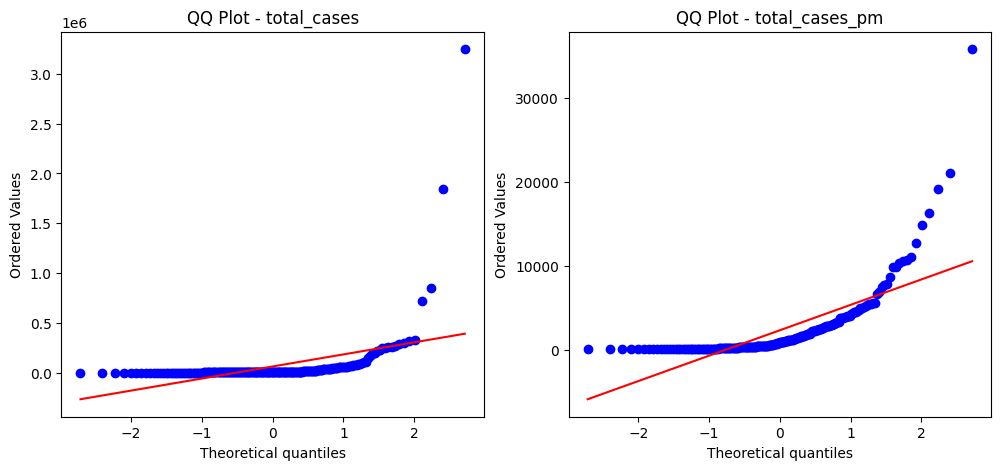


Wartości odstające dla 'total_cases':
            location  total_cases
7         Argentina     97509.00
15       Bangladesh    181129.00
17          Belarus     64767.00
27           Brazil   1839850.00
35           Canada    107335.00
40            Chile    312029.00
41            China     85071.00
42         Colombia    145362.00
57          Ecuador     67209.00
58            Egypt     81158.00
68           France    170752.00
73          Germany    198804.00
89            India    849553.00
90        Indonesia     74018.00
91             Iran    255117.00
92             Iraq     75194.00
96            Italy    242827.00
124          Mexico    295268.00
144        Pakistan    248872.00
149            Peru    322710.00
154           Qatar    103128.00
156          Russia    720547.00
163    Saudi Arabia    229480.00
173    South Africa    264184.00
176           Spain    253908.00
181          Sweden     74898.00
192          Turkey    211981.00
197  United Kingdom    288953.00
198

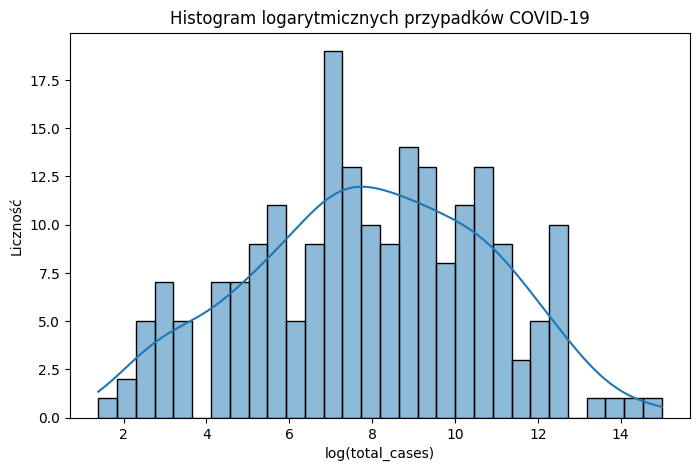

In [16]:
##Zadanie 3
##Identyfikowanie wartości odstających w pojedynczych zmiennych:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, normaltest, probplot

df = pd.read_csv("covidtotals.csv")

#a) Zdefiniuj listę zmiennych: "totvars" zawierającą kolumny: 'location','total_cases','total_deaths','total_cases_pm',
# 'total_deaths_pm' oraz listę "demovars" zawierającą zmienne demograficzne

totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']
demovars = ['population', 'median_age', 'gdp_per_capita', 'pop_density']

#b) Zmień format wyświetlania liczb zmiennoprzecinkowych na dwie cyfry po przecinku.

pd.options.display.float_format = '{:.2f}'.format

#c) Oblicz kwantyle od 0% do 100% z krokiem co 10%.

quantiles = df[totvars[1:]].quantile(np.arange(0, 1.1, 0.1))
print("Kwantyle:\n", quantiles)

#d) Oblicz skośność (skewness)

skewness = df[totvars[1:]].skew()
print("\nSkośność:\n", skewness)

#e) Oblicz kurtozę (kurtosis).

kurtosis_values = df[totvars[1:]].kurtosis()
print("\nKurtoza:\n", kurtosis_values)

#f) Stwórz metodę, która przeprowadzi test normalności dla kolumn "total_cases", "total_deaths", "total_cases_pm"
#i "total_deaths_pm".

def test_normalnosci(df, columns):
    for col in columns:
        stat, p = normaltest(df[col].dropna())  # Usunięcie brakujących wartości
        print(f"Test normalności dla {col}: stat={stat:.2f}, p={p:.5f}")

test_normalnosci(df, ['total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm'])

#g) Wyświetl wykresy kwantyl-kwantyl (QQ plot) dla kolumn "total_cases" i "total_cases_pm".

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
probplot(df['total_cases'].dropna(), dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot - total_cases")

probplot(df['total_cases_pm'].dropna(), dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot - total_cases_pm")

plt.show()

#h) Wyświetl wartości odstające dla kolumny "total_cases"

Q1 = df['total_cases'].quantile(0.25)
Q3 = df['total_cases'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_cases'] < Q1 - 1.5 * IQR) | (df['total_cases'] > Q3 + 1.5 * IQR)]
print("\nWartości odstające dla 'total_cases':\n", outliers[['location', 'total_cases']])

#i) Oblicz kwantyle dla zmiennych "pop_density" i "gdp_per_capita".

quantiles_demo = df[['pop_density', 'gdp_per_capita']].quantile([0.25, 0.5, 0.75])
print("\nKwantyle dla zmiennych demograficznych:\n", quantiles_demo)

#j) Przeprowadź transformację logarytmiczną danych dotyczących COVID-19.

df['log_total_cases'] = np.log1p(df['total_cases'])  # log(1+x) dla stabilności
df['log_total_deaths'] = np.log1p(df['total_deaths'])

#k) Wyświetl histogram dla danych przetransformowanych logarytmicznie dotyczących łącznej liczby przypadków.

plt.figure(figsize=(8, 5))
sns.histplot(df['log_total_cases'].dropna(), bins=30, kde=True)
plt.title("Histogram logarytmicznych przypadków COVID-19")
plt.xlabel("log(total_cases)")
plt.ylabel("Liczność")
plt.show()


10 losowych próbek stacji meteorologicznych:
                     station         country  latabs  elevation  avgtemp
10179       SAGE_HEN_OREGON   United States   43.51    1341.10     7.20
1950            BUTLERVILLE          Canada   47.58      16.00     4.26
2362             KOCELOVICE  Czech Republic   49.47     521.90     9.75
2562    STRASBOURG_ENTZHEIM          France   48.55     149.00    12.39
2399          VIHTI_MAASOJA         Finland   60.42      42.00     5.57
11750       FLORALA_MUNI_AP   United States   31.04      95.70    20.68
2877                 JAPURA       Indonesia    0.35      18.90    28.11
1210          FORT_NELSON_A          Canada   58.83     382.00     0.31
1855   ST_JEAN_DE_CHERBOURG          Canada   48.88     351.00     0.85
7899      LOOKOUT_POINT_DAM   United States   43.91     217.00    11.84


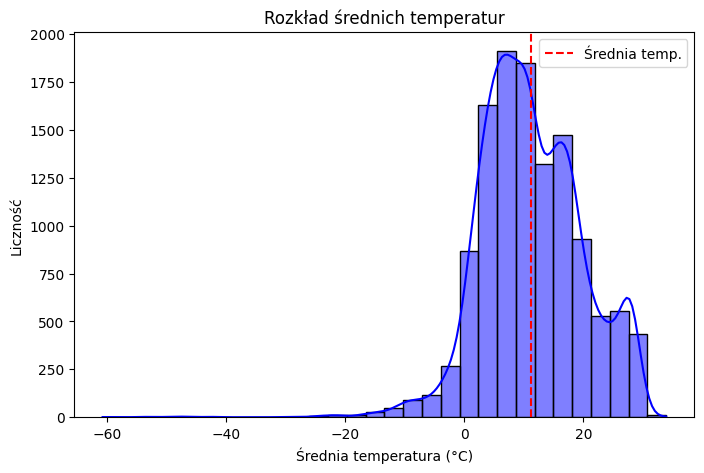

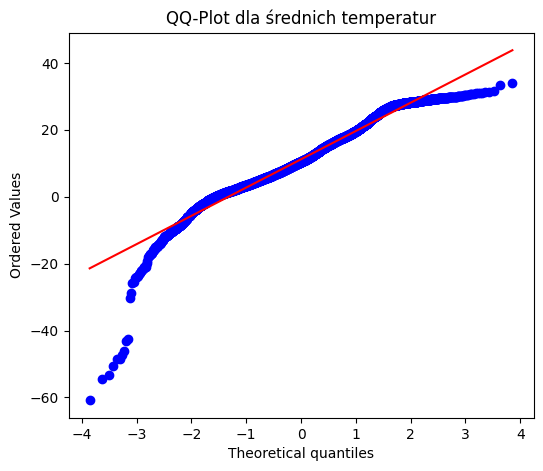


Skośność (skewness): 4.253673254297493
Kurtoza: 25.48782761476718


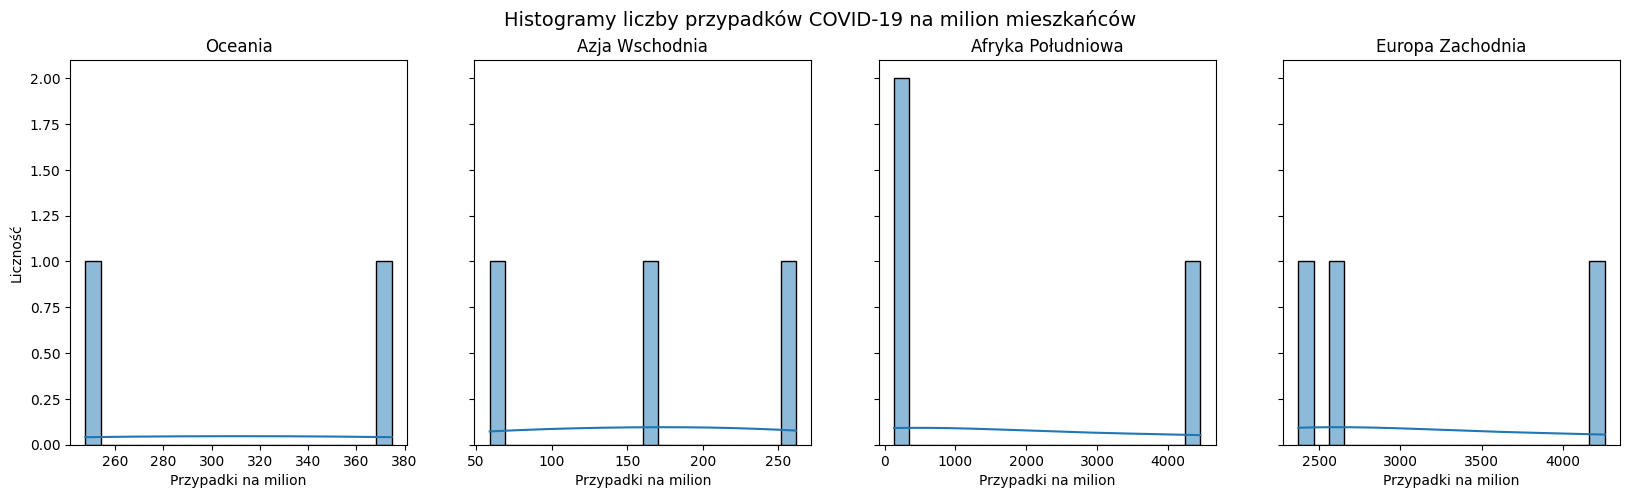

In [17]:
##Zadanie 4
##Wykorzystanie wizualizacji do identyfikacji nieoczekiwanych wartości

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, skew, kurtosis

df_temps = pd.read_csv("landtemps2019avgs.csv")
df_covid = pd.read_csv("covidtotals.csv")

#a) Wybierz 10 losowych próbek danych dotyczących stacji meteorologicznych, uwzględniających informacje takie jak
#nazwa stacji, kraj, szerokość geograficzna, wysokość nad poziomem morza oraz średnia temperatura

samples = df_temps[['station', 'country', 'latabs', 'elevation', 'avgtemp']].sample(10)
print("10 losowych próbek stacji meteorologicznych:\n", samples)

#b) Wygeneruj histogram przedstawiający rozkład średnich temperatur w stacjach meteorologicznych.
#Dodaj linię wskazującą średnią temperaturę

plt.figure(figsize=(8, 5))
sns.histplot(df_temps['avgtemp'], bins=30, kde=True, color='blue')
plt.axvline(df_temps['avgtemp'].mean(), color='red', linestyle='dashed', label='Średnia temp.')
plt.xlabel("Średnia temperatura (°C)")
plt.ylabel("Liczność")
plt.title("Rozkład średnich temperatur")
plt.legend()
plt.show()

#c)  Przeprowadź analizę kwantyl-kwantyl (qq-plot), aby zbadać, gdzie rozkład danych różni się od rozkładu normalnego.

plt.figure(figsize=(6, 5))
probplot(df_temps['avgtemp'].dropna(), dist="norm", plot=plt)
plt.title("QQ-Plot dla średnich temperatur")
plt.show()

#d) Oblicz skośności i kurtozy dla danych dotyczących liczby przypadków COVID-19 na milion mieszkańców.

print("\nSkośność (skewness):", skew(df_covid['total_cases_pm'].dropna()))
print("Kurtoza:", kurtosis(df_covid['total_cases_pm'].dropna()))

#e) Narysuj histogramy przedstawiające liczbę przypadków COVID-19 na milion mieszkańców dla czterech wybranych
#regionów: Oceania / Australia, Azja Wschodnia, Afryka Południowa oraz Europa Zachodnia. Histogramy powinny
#być ułożone jedna obok drugiej.

regions = {
    "Oceania": ["Australia", "New Zealand"],
    "Azja Wschodnia": ["China", "Japan", "South Korea"],
    "Afryka Południowa": ["South Africa", "Namibia", "Botswana"],
    "Europa Zachodnia": ["Germany", "France", "United Kingdom"]
}

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for ax, (region, countries) in zip(axes, regions.items()):
    region_data = df_covid[df_covid['location'].isin(countries)]
    sns.histplot(region_data['total_cases_pm'].dropna(), bins=20, kde=True, ax=ax)
    ax.set_title(f"{region}")
    ax.set_xlabel("Przypadki na milion")
    ax.set_ylabel("Liczność")

plt.suptitle("Histogramy liczby przypadków COVID-19 na milion mieszkańców", fontsize=14)
plt.show()